# Hello World

In [1]:
"Hello World"

'Hello World'

# Importando Bibliotecas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Importando Dados

In [3]:
!kaggle datasets download -d tawfikelmetwally/chicago-house-price

zsh:1: command not found: kaggle


In [4]:
!unzip /content/chicago-house-price.zip

unzip:  cannot find or open /content/chicago-house-price.zip, /content/chicago-house-price.zip.zip or /content/chicago-house-price.zip.ZIP.


In [5]:
df = pd.read_csv('./realest.csv')

In [6]:
df.head()

,Price,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage,Condition
0,53.0,2.0,967.0,5.0,39.0,652.0,1.5,0.0,0.0
1,55.0,2.0,815.0,5.0,33.0,1000.0,1.0,2.0,1.0
2,56.0,3.0,900.0,5.0,35.0,897.0,1.5,1.0,0.0
3,58.0,3.0,1007.0,6.0,24.0,964.0,1.5,2.0,0.0
4,64.0,3.0,1100.0,7.0,50.0,1099.0,1.5,1.5,0.0


# Pré-processamento e Análise de Dados

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      156 non-null    float64
 1   Bedroom    156 non-null    float64
 2   Space      146 non-null    float64
 3   Room       156 non-null    float64
 4   Lot        146 non-null    float64
 5   Tax        147 non-null    float64
 6   Bathroom   156 non-null    float64
 7   Garage     156 non-null    float64
 8   Condition  156 non-null    float64
dtypes: float64(9)
memory usage: 11.2 KB


In [8]:
df.describe()

,Price,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage,Condition
count,156.000000,156.000000,146.000000,156.000000,146.000000,147.000000,156.000000,156.000000,156.000000
mean,56.474359,3.166667,1097.246575,6.500000,32.808219,911.707483,1.480769,0.846154,0.230769
std,12.875307,1.348037,462.540698,1.675247,8.457859,443.263430,0.529408,0.808454,0.422682
min,32.000000,1.000000,539.000000,4.000000,24.000000,418.000000,1.000000,0.000000,0.000000
25%,46.000000,2.000000,805.250000,5.000000,25.000000,652.500000,1.000000,0.000000,0.000000
50%,55.000000,3.000000,965.500000,6.000000,30.000000,821.000000,1.500000,1.000000,0.000000
75%,65.000000,4.000000,1220.500000,7.000000,37.000000,1012.500000,2.000000,1.500000,0.000000
max,90.000000,8.000000,2295.000000,12.000000,50.000000,2752.000000,3.000000,2.000000,1.000000


In [9]:
df.Condition.value_counts()

Condition
0.0    120
1.0     36
Name: count, dtype: int64

In [10]:
df['Condition'].value_counts()

Condition
0.0    120
1.0     36
Name: count, dtype: int64

In [11]:
df['Price'].max()

90.0

In [12]:
df['Price'].min()

32.0

In [13]:
df['Price'].mean()

56.47435897435897

In [14]:
df['Price'].where(df['Tax'] > 1000).dropna()

4      64.0
7      70.0
9      82.0
10     85.0
14     56.0
18     66.0
27     58.0
30     62.0
33     70.0
35     81.0
36     88.0
40     55.0
44     64.0
59     70.0
61     84.0
62     85.0
66     55.0
70     69.0
82     66.0
85     71.0
87     80.0
88     88.0
92     58.0
96     67.0
105    61.0
108    63.0
111    73.0
113    81.0
114    90.0
118    57.0
122    63.0
134    67.0
137    70.0
139    85.0
140    88.0
144    55.0
148    69.0
Name: Price, dtype: float64

In [15]:
df[df['Tax'] > 1000]['Price']

4      64.0
7      70.0
9      82.0
10     85.0
14     56.0
18     66.0
27     58.0
30     62.0
33     70.0
35     81.0
36     88.0
40     55.0
44     64.0
59     70.0
61     84.0
62     85.0
66     55.0
70     69.0
82     66.0
85     71.0
87     80.0
88     88.0
92     58.0
96     67.0
105    61.0
108    63.0
111    73.0
113    81.0
114    90.0
118    57.0
122    63.0
134    67.0
137    70.0
139    85.0
140    88.0
144    55.0
148    69.0
Name: Price, dtype: float64

In [16]:
df[df['Space'] > 1000]['Lot']

3      24.0
4      50.0
6       NaN
7      29.0
8       NaN
       ... 
140    50.0
143    30.0
144    50.0
146    30.0
149    25.0
Name: Lot, Length: 70, dtype: float64

In [17]:
df.iloc[6]

Price          49.0
Bedroom         5.0
Space        1400.0
Room            8.0
Lot             NaN
Tax           678.0
Bathroom        1.0
Garage          1.0
Condition       1.0
Name: 6, dtype: float64

In [18]:
df.iloc[8]

Price          72.0
Bedroom         4.0
Space        1290.0
Room            8.0
Lot             NaN
Tax           800.0
Bathroom        1.5
Garage          1.5
Condition       0.0
Name: 8, dtype: float64

In [19]:
df.isnull().sum()

Price         1
Bedroom       1
Space        11
Room          1
Lot          11
Tax          10
Bathroom      1
Garage        1
Condition     1
dtype: int64

In [20]:
df.drop(df.tail(1).index, inplace=True)
df.tail()

,Price,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage,Condition
151,42.0,3.0,585.0,5.0,50.0,713.0,1.0,0.0,0.0
152,44.0,3.0,820.0,5.0,27.0,NaN,1.0,0.0,1.0
153,43.0,2.0,593.0,4.0,30.0,465.0,2.0,1.0,0.0
154,53.0,3.0,716.0,6.0,30.0,585.0,1.0,2.0,1.0
155,62.0,4.0,951.0,7.0,30.0,895.0,2.0,1.0,0.0


In [21]:
df['Space'].fillna(df['Space'].mean(), inplace=True)
df['Lot'].fillna(df['Lot'].mean(), inplace=True)
df['Tax'].fillna(df['Tax'].mean(), inplace=True)

/var/folders/9d/c56c74zx1fx2s174bb43ln900000gn/T/ipykernel_74174/3728578007.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Space'].fillna(df['Space'].mean(), inplace=True)
/var/folders/9d/c56c74zx1fx2s174bb43ln900000gn/T/ipykernel_74174/3728578007.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values 

In [22]:
df['Condition'] = df['Condition'].replace({0: 'Bad', 1: 'Good'})

In [23]:
df.isnull().sum()

Price        0
Bedroom      0
Space        0
Room         0
Lot          0
Tax          0
Bathroom     0
Garage       0
Condition    0
dtype: int64

# Vizualização de Dados

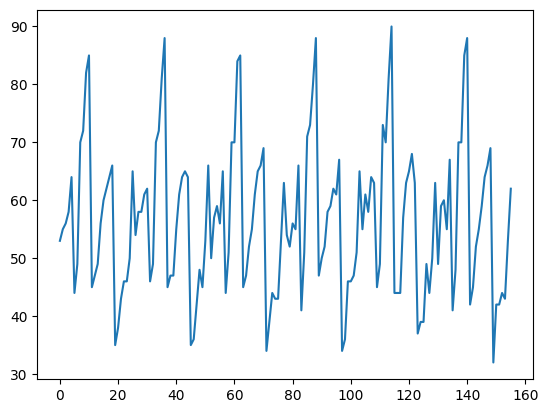

In [24]:
plt.plot(df['Price'])

([<matplotlib.patches.Wedge at 0x3125ac050>,
 [Text(-0.8233618545088073, 0.7294348884854754, ''),
  Text(0.8233618886561178, -0.7294348499411245, '')])

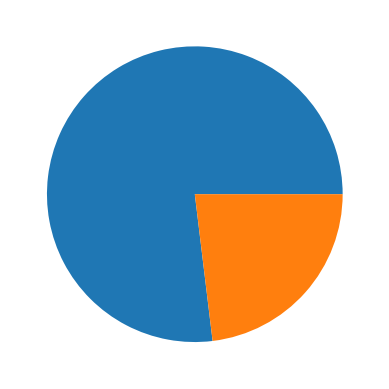

In [25]:
plt.pie(df['Condition'].value_counts())

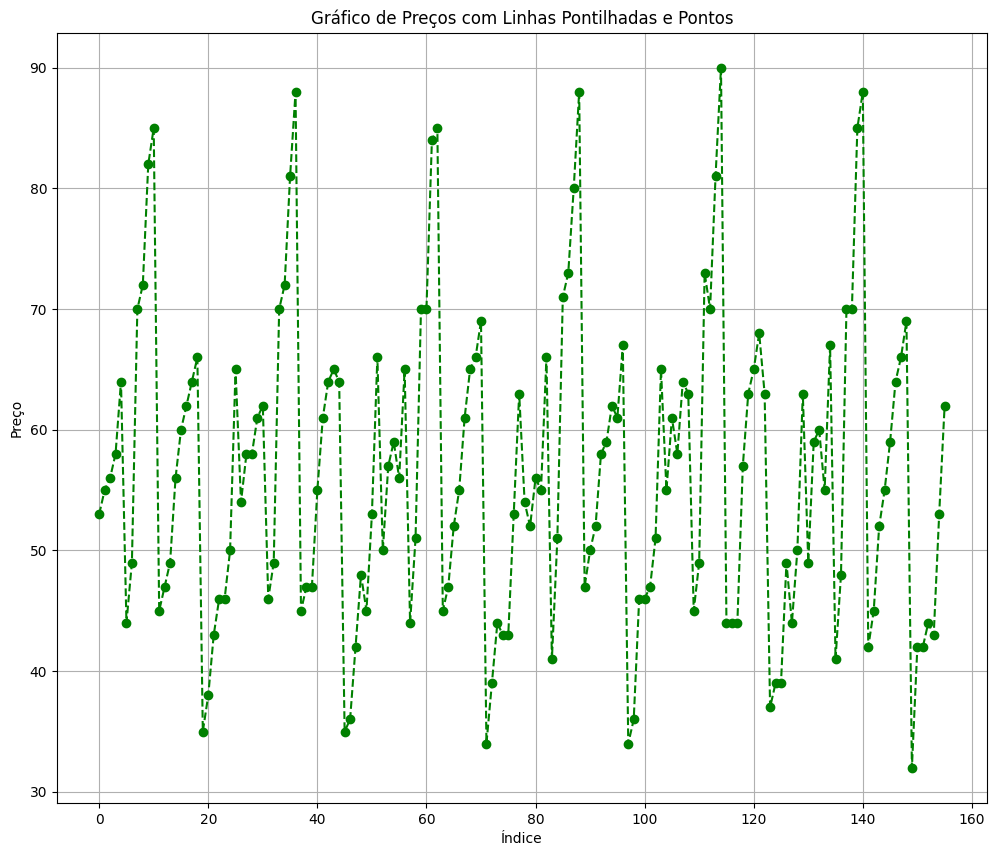

In [26]:
plt.figure(figsize=(12, 10))
plt.plot(df['Price'], linestyle='--', marker='o', color='g')
plt.title('Gráfico de Preços com Linhas Pontilhadas e Pontos')
plt.xlabel('Índice')
plt.ylabel('Preço')
plt.grid(True)
plt.show()

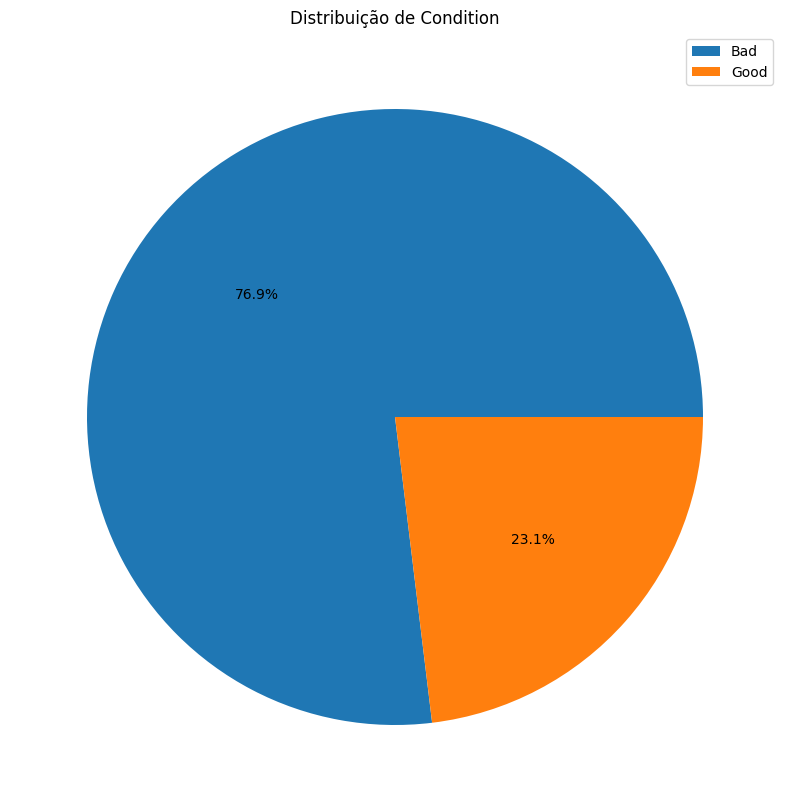

In [27]:
plt.figure(figsize=(12, 10))
plt.pie(df['Condition'].value_counts(), autopct='%1.1f%%')
plt.title('Distribuição de Condition')
plt.legend(labels=df['Condition'].value_counts().index, loc='best')
plt.show()

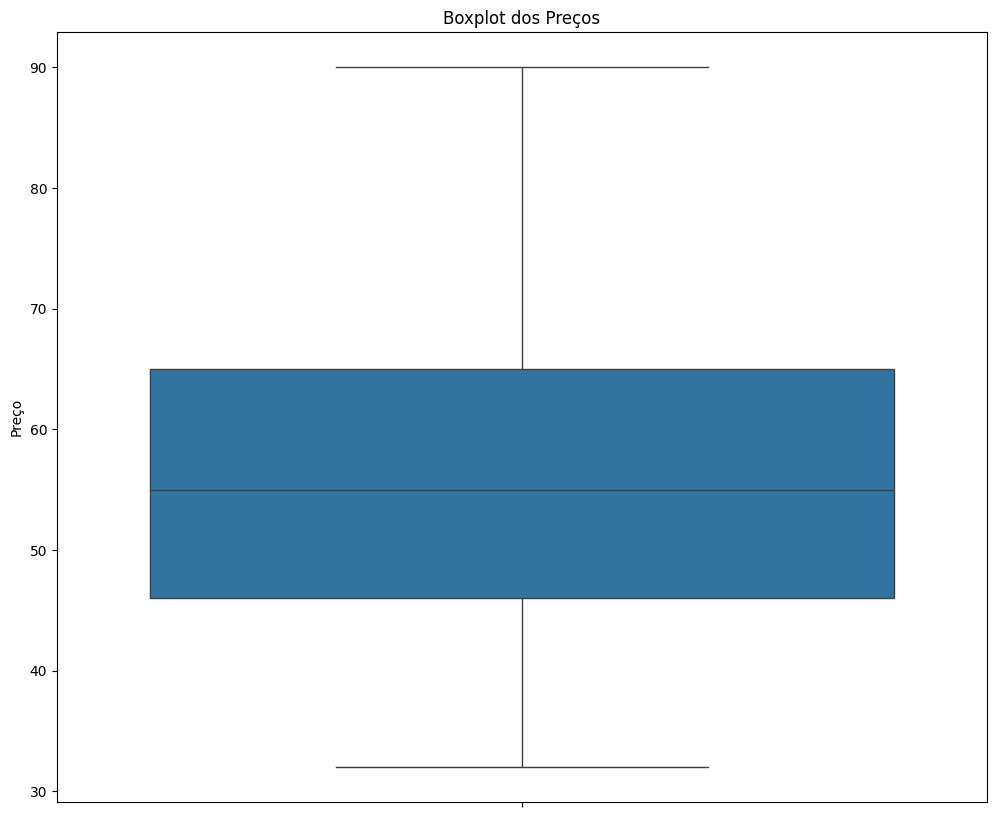

In [28]:
plt.figure(figsize=(12, 10))
sns.boxplot(df['Price'])
plt.title('Boxplot dos Preços')
plt.ylabel('Preço')
plt.show()

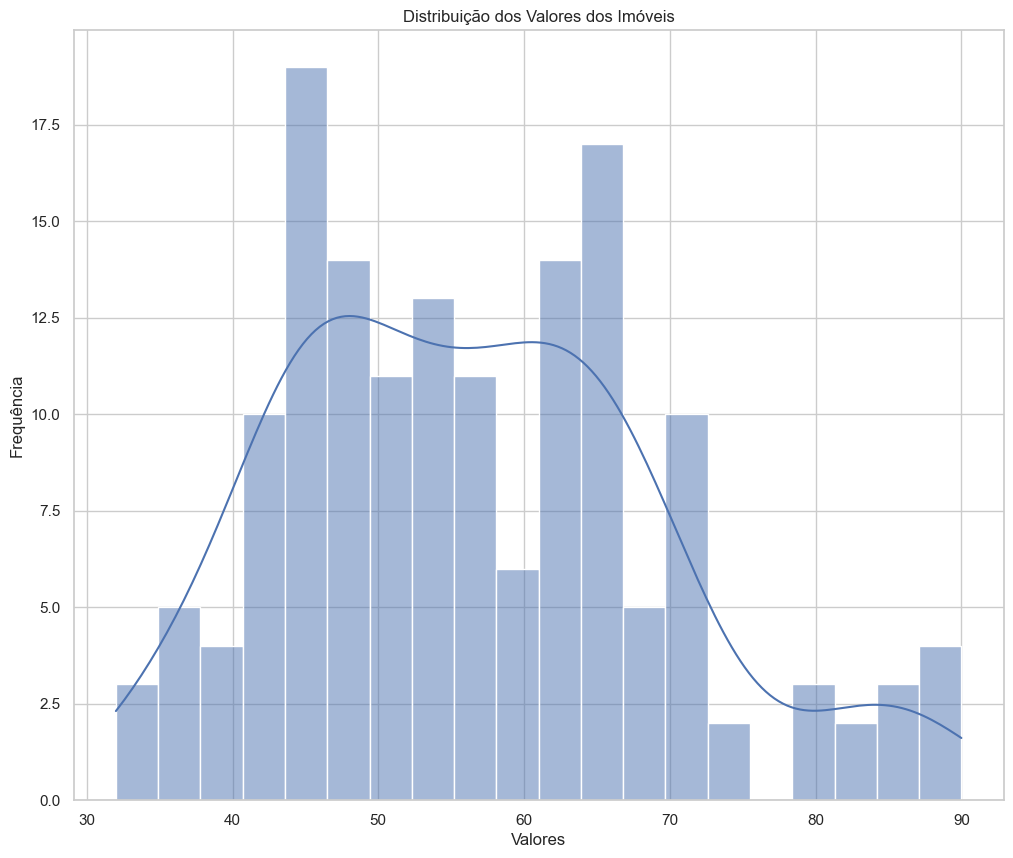

In [29]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 10))
ax = sns.histplot(df['Price'], bins=20, kde=True)
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.title('Distribuição dos Valores dos Imóveis')
plt.show()

In [30]:
df['Price'] = df['Price']*1000

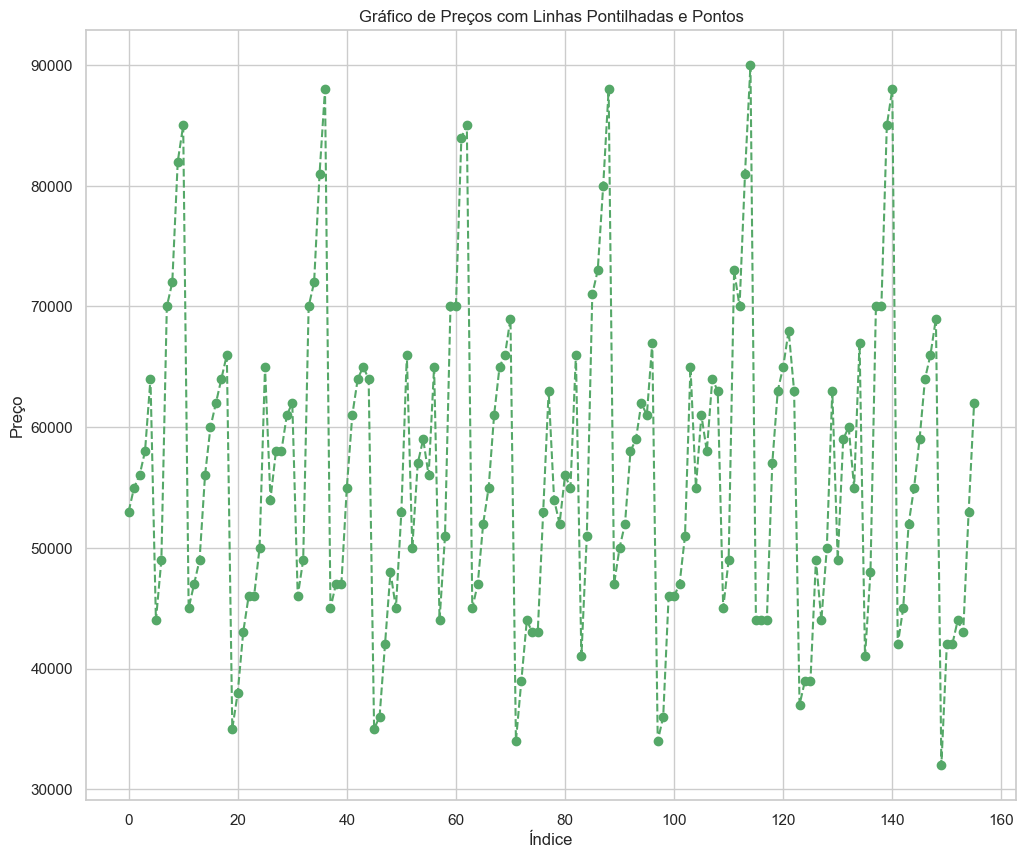

In [31]:
plt.figure(figsize=(12, 10))
plt.plot(df['Price'], linestyle='--', marker='o', color='g')
plt.title('Gráfico de Preços com Linhas Pontilhadas e Pontos')
plt.xlabel('Índice')
plt.ylabel('Preço')
plt.grid(True)
plt.show()

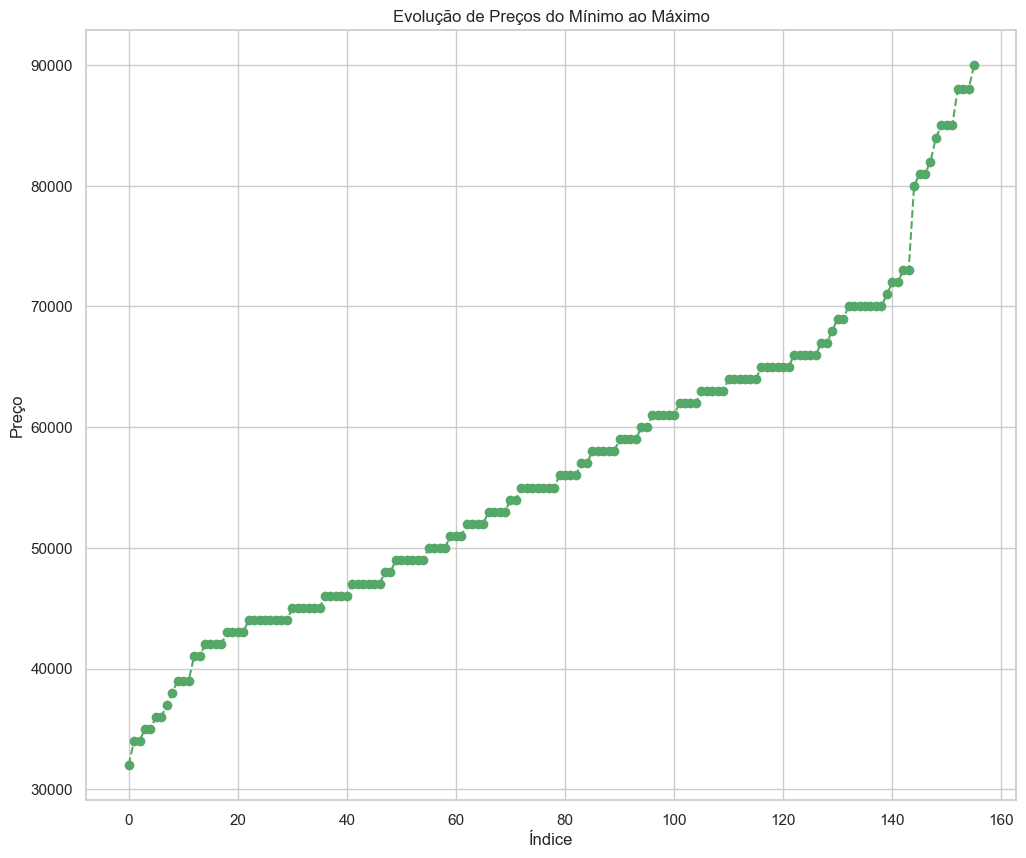

In [32]:
df_sorted = df.sort_values(by='Price').reset_index(drop=True)

plt.figure(figsize=(12, 10))
plt.plot(df_sorted['Price'], linestyle='--', marker='o', color='g')
plt.title('Evolução de Preços do Mínimo ao Máximo')
plt.xlabel('Índice')
plt.ylabel('Preço')
plt.grid(True)
plt.show()

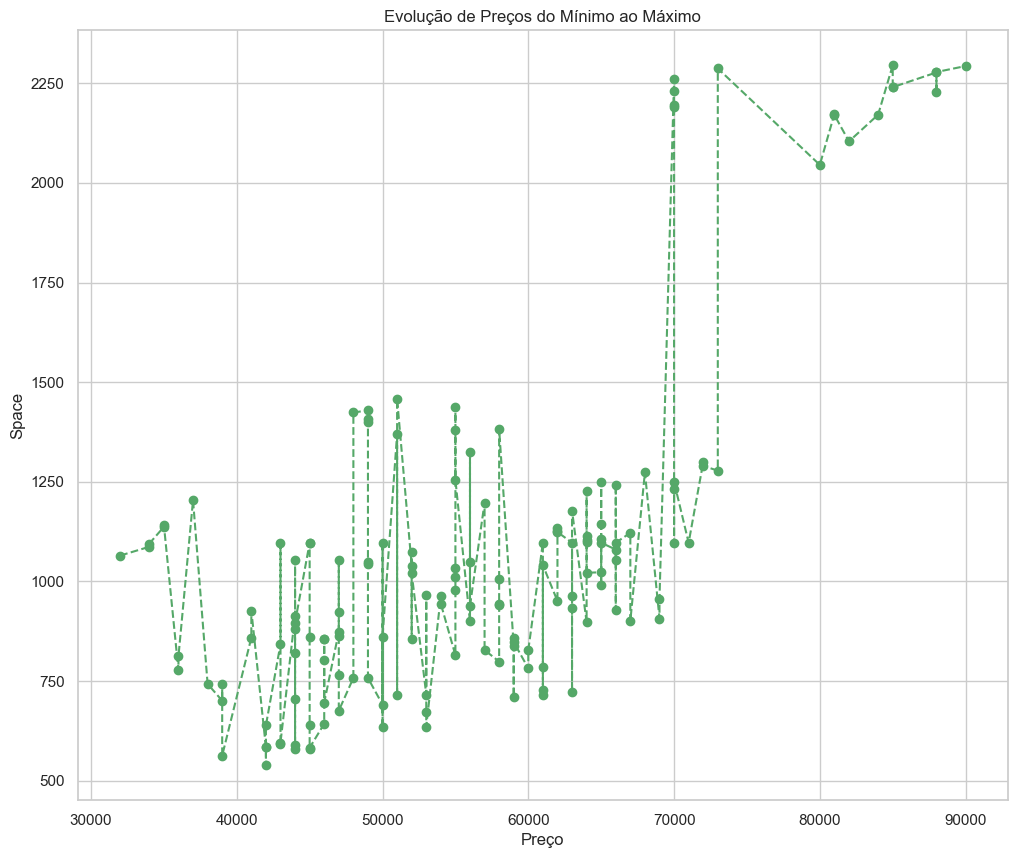

In [33]:
plt.figure(figsize=(12, 10))
plt.plot(df_sorted['Price'], df_sorted['Space'], linestyle='--', marker='o', color='g')
plt.title('Evolução de Preços do Mínimo ao Máximo')
plt.ylabel('Space')
plt.xlabel('Preço')
plt.grid(True)
plt.show()

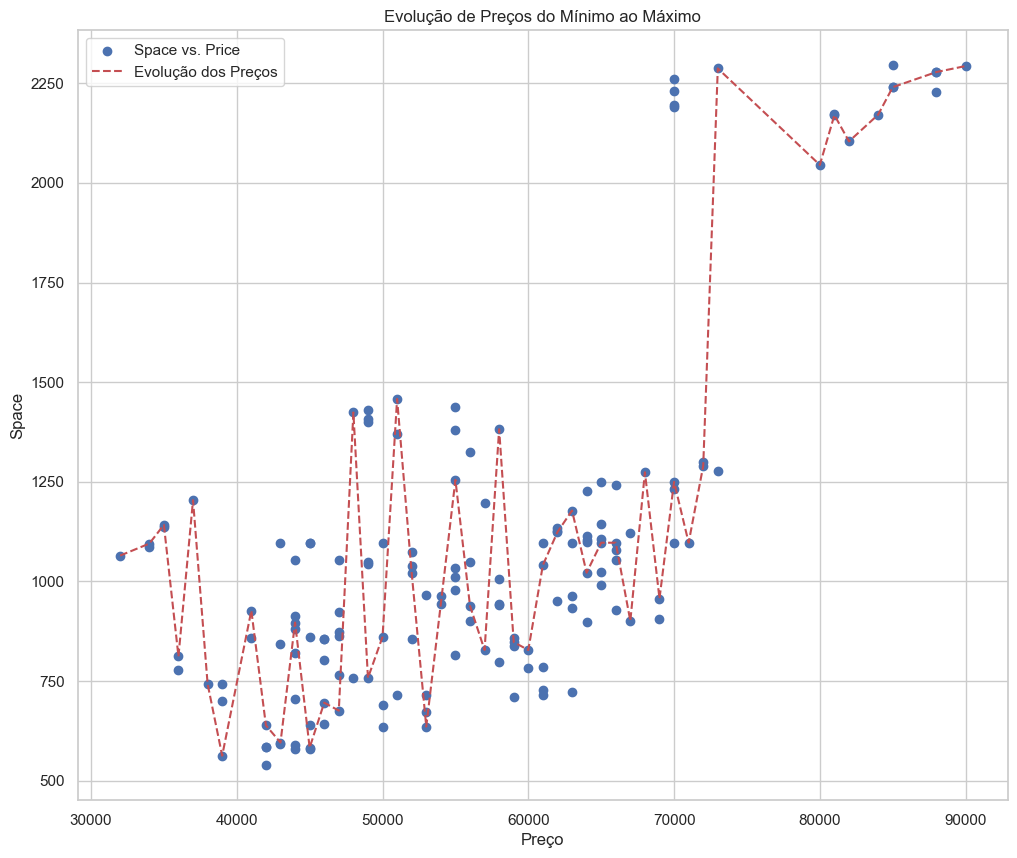

In [34]:
plt.figure(figsize=(12, 10))
plt.scatter(df['Price'], df['Space'], color='b', label='Space vs. Price')
plt.plot(df_sorted['Price'], np.interp(df_sorted['Price'], df_sorted['Price'], df_sorted['Space']), linestyle='--', color='r', label='Evolução dos Preços')
plt.title('Evolução de Preços do Mínimo ao Máximo')
plt.ylabel('Space')
plt.xlabel('Preço')
plt.grid(True)
plt.legend()
plt.show()

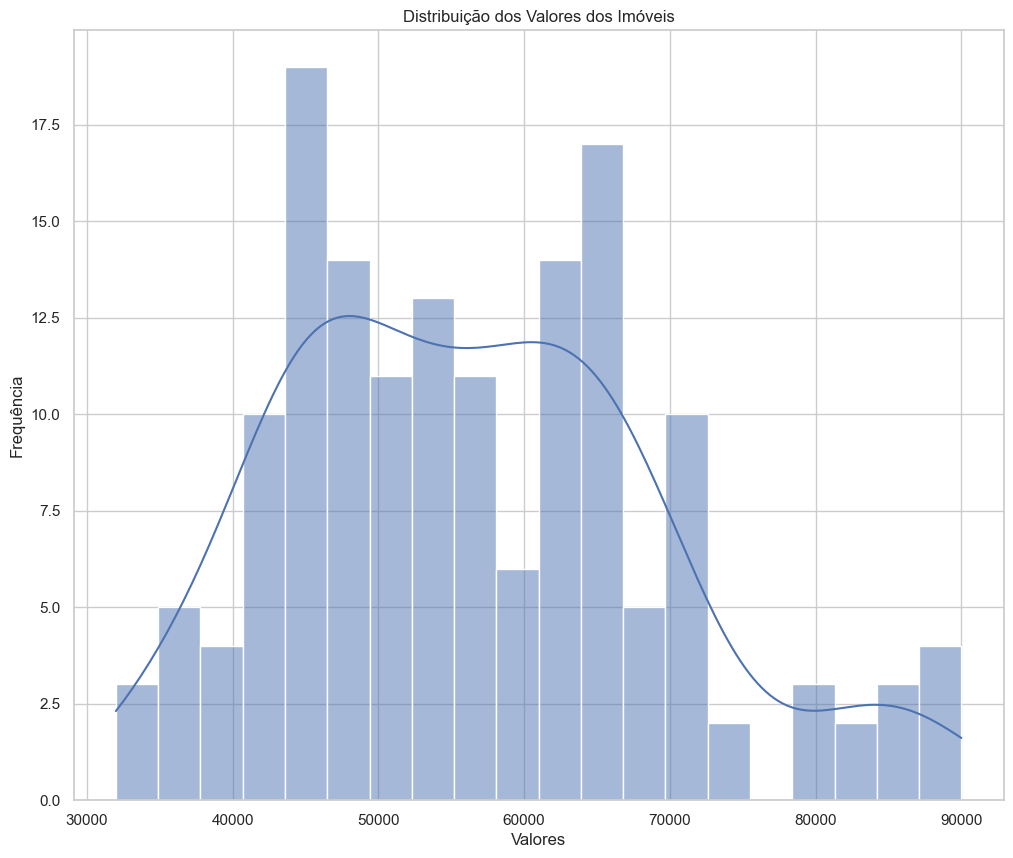

In [35]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 10))
ax = sns.histplot(df_sorted['Price'], bins=20, kde=True)
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.title('Distribuição dos Valores dos Imóveis')
plt.show()

# Predição utilizando Regressão Linear

In [36]:
df['Condition'] = df['Condition'].replace({'Bad':0, 'Good':1})

/var/folders/9d/c56c74zx1fx2s174bb43ln900000gn/T/ipykernel_74174/1421147135.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Condition'] = df['Condition'].replace({'Bad':0, 'Good':1})


In [37]:
X = df.drop('Price', axis=1)

In [38]:
y = df['Price']

In [39]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=42)

In [40]:
X_train.shape

(109, 8)

In [41]:
y_train.shape

(109,)

In [42]:
X_test.shape

(47, 8)

In [43]:
y_test.shape

(47,)

In [44]:
X_train.head()

,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage,Condition
86,4.0,1278.0,8.0,33.0,810.0,1.5,1.5,0
11,2.0,641.0,5.0,25.0,860.0,1.0,0.0,0
60,3.0,1233.0,8.0,33.0,827.0,1.5,1.5,0
67,3.0,715.0,5.0,25.0,815.0,1.0,0.0,0
124,4.0,744.0,6.0,25.0,531.0,1.0,0.0,0


In [45]:
X_test.head()

,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage,Condition
96,2.0,901.0,5.0,30.0,1373.0,1.0,1.0,0
69,4.0,1243.0,8.0,37.0,591.0,2.0,2.0,0
82,3.0,1080.0,7.0,50.0,1127.0,1.5,1.5,0
76,3.0,673.0,6.0,30.0,589.0,1.0,2.0,1
114,8.0,2293.0,12.0,50.0,1181.0,3.0,2.0,0


In [46]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [47]:
model = LinearRegression()
model = model.fit(X_train_scaled, y_train)

# Validação do Modelo

In [48]:
model.score(X_test_scaled, y_test)

0.659841753902116

In [49]:
pred = model.predict(X_test_scaled)

In [50]:
mse = mean_squared_error(y_test, pred)

print(f"Erro Médio Quadrático (MSE): {mse}")

Erro Médio Quadrático (MSE): 62537377.50351864


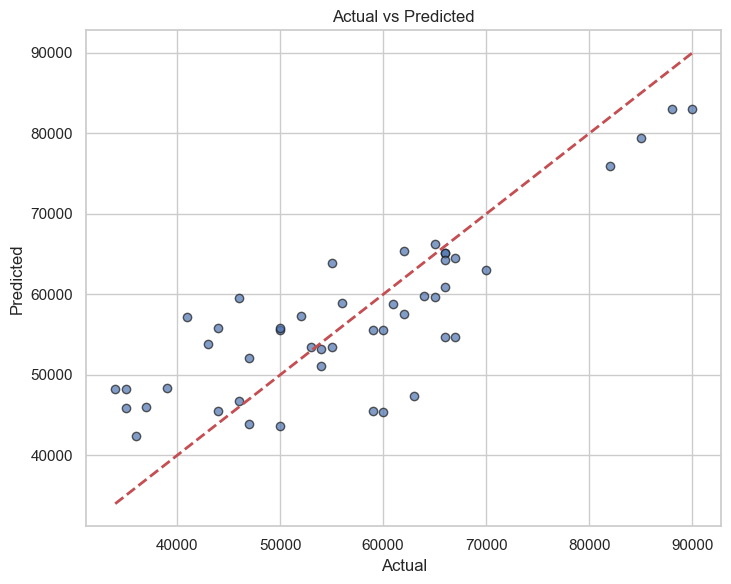

In [51]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, pred, edgecolor='k', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.grid(True)
plt.tight_layout()
plt.show()